# Qubit Pure Dephasing: Bloch-Redfield vs Lindblad
We study a qubit with Hamiltonian $H = \frac{mega_0}{2} igma_z$ coupled to a bosonic bath inducing pure dephasing.
We compare QuTiP's `brmesolve` (full Redfield) and `mesolve` with a Lindblad dephasing operator. We monitor density matrix eigenvalues to detect CP violations (if any).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import basis, sigmaz, sigmax, Qobj, brmesolve, mesolve, BosonicEnvironment, tensor
from qutip import OhmicEnvironment
from diagnostics import density_matrix_positivity, trajectory_min_eigs
from plotting import style, plot_min_eig, plot_coherences, plot_populations
style()
w0 = 1.0  # qubit splitting
H = 0.5 * w0 * sigmaz()
# pure dephasing coupling operator A = sigma_z (commutes with H)
A = sigmaz()

# Ohmic bath providing S(0) > 0 giving dephasing rate.
bath = OhmicEnvironment(T=0.5, wc=10.0, alpha=0.05, s=1.0)
psi0 = (basis(2,1)+basis(2,0)).unit()
tlist = np.linspace(0,100,300)
# Bloch-Redfield evolution
res_br = brmesolve(H=H, psi0=psi0, tlist=tlist, a_ops=[[A, bath]], e_ops=[], sec_cutoff=-1)
# Lindblad model with rate gamma_phi = S(0)
gamma_phi = bath.power_spectrum(0)
res_me = mesolve(H=H, rho0=psi0, tlist=tlist, c_ops=[np.sqrt(gamma_phi)*A], e_ops=[])

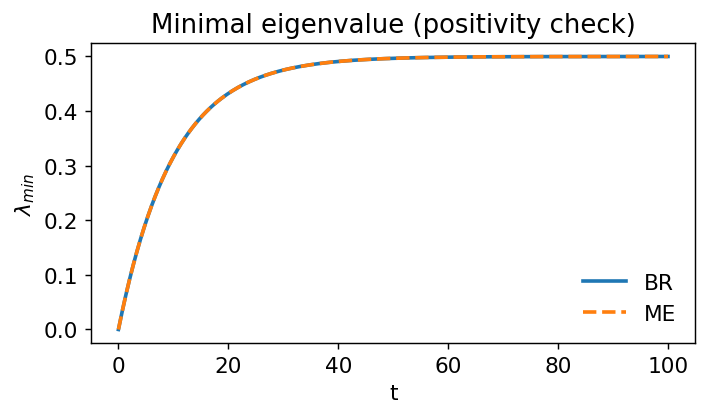

In [2]:
min_eigs_br = trajectory_min_eigs(res_br.states)
min_eigs_me = trajectory_min_eigs(res_me.states)
plt.figure(figsize=(6,3))
plt.plot(tlist, min_eigs_br, label='redfield')
plt.plot(tlist, min_eigs_me, label='linblad', ls='--')
plt.ylabel(r'$\lambda_{min}$')
plt.xlabel('t')
plt.legend(frameon=False)
plt.title('Minimal eigenvalue (positivity check)')
plt.show()

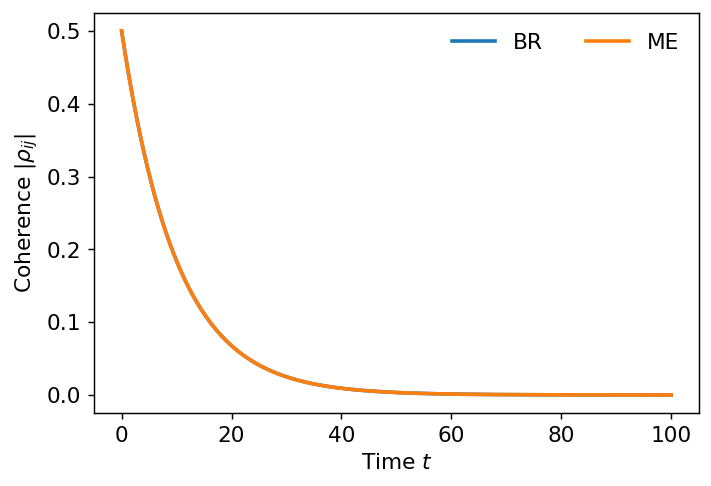

In [3]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_coherences(tlist, res_br.states, ax=ax, labels=["redfield"])
plot_coherences(tlist, res_me.states, ax=ax, labels=["linblad"])
plt.show()

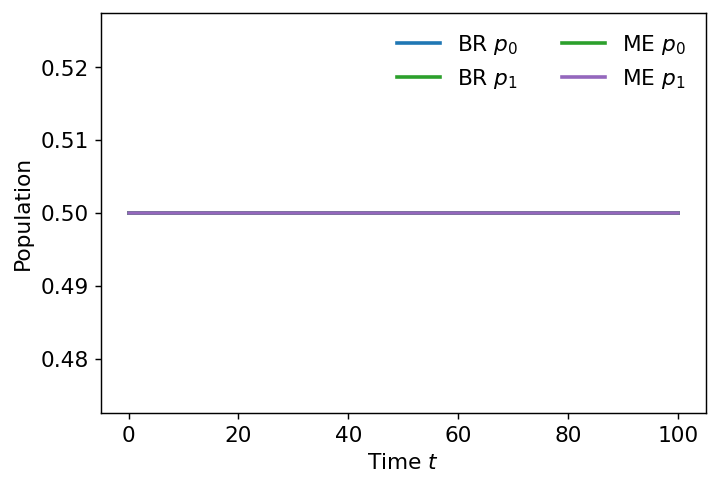

In [4]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_populations(tlist, res_br.states, ax=ax, labels=["redfield $p_0$", "redfield $p_1$"])
plot_populations(tlist, res_me.states, ax=ax, labels=["linblad $p_0$", "linblad $p_1$"])
plt.show()